In [1]:
import requests
from bs4 import BeautifulSoup
import re
import csv
import pandas as pd
import numpy as np
from time import sleep
import os
import matplotlib.pyplot as plt

In [2]:
company_url="https://www.flipkart.com"
product_url=[]
product_title=[]
product_price=[]
product_rating=[]
product_discount_pc=[]
bank_offers_on_product=[]
product_brand=[]
brand_name=[]

In [3]:
def web_extract():
    search=['shoes']
    base_url="https://www.flipkart.com/search?q="+str(search)+"&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off"
    search_url=[]
    for i in range(1,4): #here you can change number of pages
        search_url.append(base_url+str(i))
        #print ("search Url",search_url)
        for page in search_url:
            r=requests.get(page)
            soup=BeautifulSoup(r.text,'html5lib')
            #print (soup1.title)
            links=[link.get('href') for link in soup.findAll(class_='_3dqZjq', href=True)]
            #print ("links here:",links)

            for i in links:
                url=str(company_url)+str(i)
                product_url.append(url) #appending company_url+url fetched from findAll function using soup
            #print ("product_url",len(product_url)) #here will get product url for each product
        #print ("prod url says : ", product_url)
        for i in product_url:
            r=requests.get(i)
            data=BeautifulSoup(r.text,'html5lib')
            #print ("[[[[[[[[[[[[[[[[[[[[[[",data)
            product_title.append(data.title)
            #print ("Product Title: " ,len(product_title))
            #print ("title says :", product_title)
        #here will get title of the product
        #############finding price of a product####################
            try:
                price=data.find(class_="_1vC4OE")
                product_price.append(price.text)
                #print ("product detailed price :",product_price)
            except AttributeError:
                pass
        #################################ratings of the product######################################
            try:
                ratings=data.find(class_='hGSR34 bqXGTW')
                rating=ratings.get_text()
                product_rating.append(rating)
            except AttributeError:
                pass
        #######################check for discount percentage ################################################
            try:
                discount=data.find(class_='VGWI6T')
                product_discount_pc.append(discount.text)
            except AttributeError:
                pass
            #print ("discounted product : ",product_discount_pc)
        ########################################to find bank offers for respective product############################################
            try:
                bank_offers=data.find(class_="_2-n-Lg col")
                bank_offers_on_product.append(bank_offers.text)
            except AttributeError:
                pass
            #print ("bank offers on product : ", bank_offers_on_product)
        ###################################to find brand of the product######################################
            try:
                brand_details=data.find(class_="_9E25nV")
                product_brand.append(brand_details.text)
            except AttributeError:
                pass
            #print ("brand name : ", product_brand)

#print (product_rating,product_brand,product_price,product_title,bank_offers_on_product,product_discount_pc)


In [4]:
def scrapper_to_csv():
    file_name = "flipkart_shoes_data.csv"
    dict1 = {'Product_Url': product_url, 'Product_Title': product_title, 'Brand_name': brand_name,
             "Product_Price": product_price, "Product_Rating": product_rating,
             "Product_Discount_Percentage": product_discount_pc, "Bank_Offers_ON_Product": bank_offers_on_product}
    data = pd.DataFrame.from_dict(dict1, orient='index')
    data.to_csv(file_name)
    sleep(10)
    process_data = pd.read_csv(r'C:\python3\hobby_projects\flipkart_shoes_data.csv')
    # print (process_data)
    process_data = process_data.transpose()
    # print (process_data[5])
    # process_data[0]=Product_Url
    # process_data[1]=Product_Title
    # process_data[0]=Product_Price
    # process_data[1]=Product_Ratings
    # process_data[0]=Product_Discount_pc
    # process_data[1]=Bank_offer

    process_data = process_data.rename(
        columns={0: "Product_Url", 1: "Product_Title", 2:"Brand_name",3: "Product_Price", 4: "Product_Ratings", 5: "Product_Discount",
                 6: "Bank_Offer"})
    # print (process_data['Product_Title'])
    # print (process_data['Bank_Offer'])
    process_data.dropna(how="all")
    return process_data

In [5]:
#######################################################main program #################################################

web_extract()
for i in product_title:
    brand_name.append((str(i).split("-")[0].split(" ")[0].split(">")[1]))
final_data=(product_url,product_title,brand_name,product_price,product_rating,product_discount_pc,bank_offers_on_product)
formatted_data=scrapper_to_csv()
print (formatted_data)

                                                  Product_Url  \
Unnamed: 0                                        Product_Url   
0           https://www.flipkart.com/density-socks-running...   
1           https://www.flipkart.com/absolute-comfort-walk...   
2           https://www.flipkart.com/mileswalker-mesh-runn...   
3           https://www.flipkart.com/asian-cosco-running-s...   
...                                                       ...   
395                                                       NaN   
396                                                       NaN   
397                                                       NaN   
398                                                       NaN   
399                                                       NaN   

                                                Product_Title   Brand_name  \
Unnamed: 0                                      Product_Title   Brand_name   
0           <title>Density SOCKS Running Shoes For Men - B...  

In [22]:
print (formatted_data.iloc[195:199])   ##############to check mid data has been uploaded correctly or not ################## 

                                           Product_Url  \
194  https://www.flipkart.com/layasa-mesh-cricket-b...   
195  https://www.flipkart.com/beerock-oxygen-runnin...   
196  https://www.flipkart.com/puma-corode-idp-runni...   
197  https://www.flipkart.com/layasa-mesh-cricket-b...   

                                         Product_Title Brand_name  \
194  <title>Layasa Mesh,Cricket, Badminton, Volly B...     Layasa   
195  <title>Beerock Oxygen Running Shoes For Men - ...    Beerock   
196  <title>Puma Corode IDP Running Shoes For Men -...       Puma   
197  <title>DUNKASTON Running Shoes For Men - Buy D...  DUNKASTON   

    Product_Price Product_Ratings Product_Discount  \
194          ₹399             4.1          60% off   
195          ₹459             3.5          54% off   
196        ₹2,450             4.4          43% off   
197          ₹379             3.7          62% off   

                                            Bank_Offer  
194  Bank Offer5% Unlimited Cashbac

In [6]:
###################Since the data has NaN value clean them up by using dropna function ######################
formatted_data=formatted_data.dropna()
print (formatted_data)

                                                  Product_Url  \
Unnamed: 0                                        Product_Url   
0           https://www.flipkart.com/density-socks-running...   
1           https://www.flipkart.com/absolute-comfort-walk...   
2           https://www.flipkart.com/mileswalker-mesh-runn...   
3           https://www.flipkart.com/asian-cosco-running-s...   
...                                                       ...   
235         https://www.flipkart.com/beerock-oxygen-runnin...   
236         https://www.flipkart.com/puma-corode-idp-runni...   
237         https://www.flipkart.com/layasa-mesh-cricket-b...   
238         https://www.flipkart.com/dunkaston-running-sho...   
239         https://www.flipkart.com/essence-casuals-men/p...   

                                                Product_Title   Brand_name  \
Unnamed: 0                                      Product_Title   Brand_name   
0           <title>Density SOCKS Running Shoes For Men - B...  

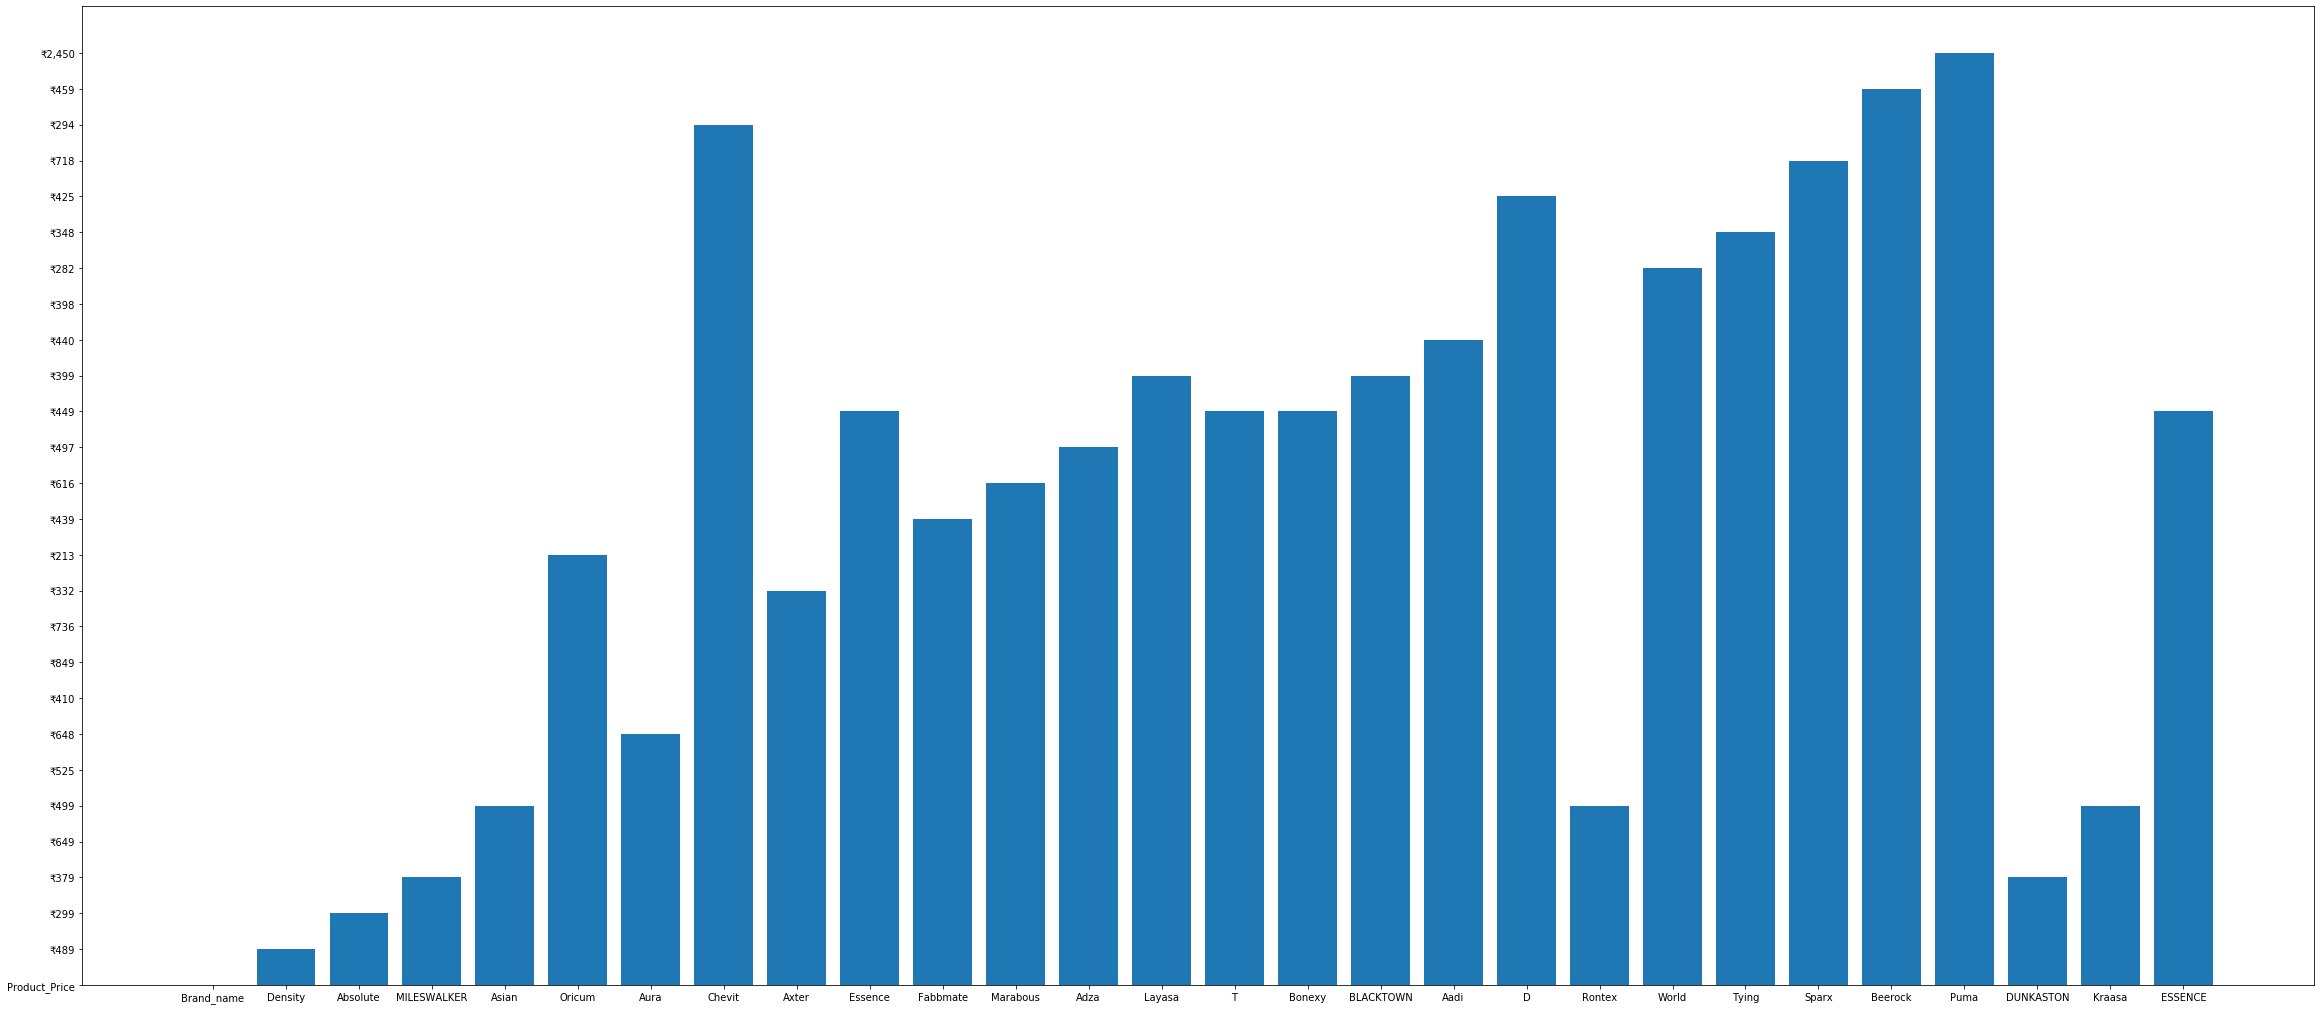

In [7]:
########################Plot to get Brand_name versus Product_price #############################
fig = plt.figure(figsize=(40,18))
plt.bar(formatted_data['Brand_name'],formatted_data['Product_Price'])
plt.show()

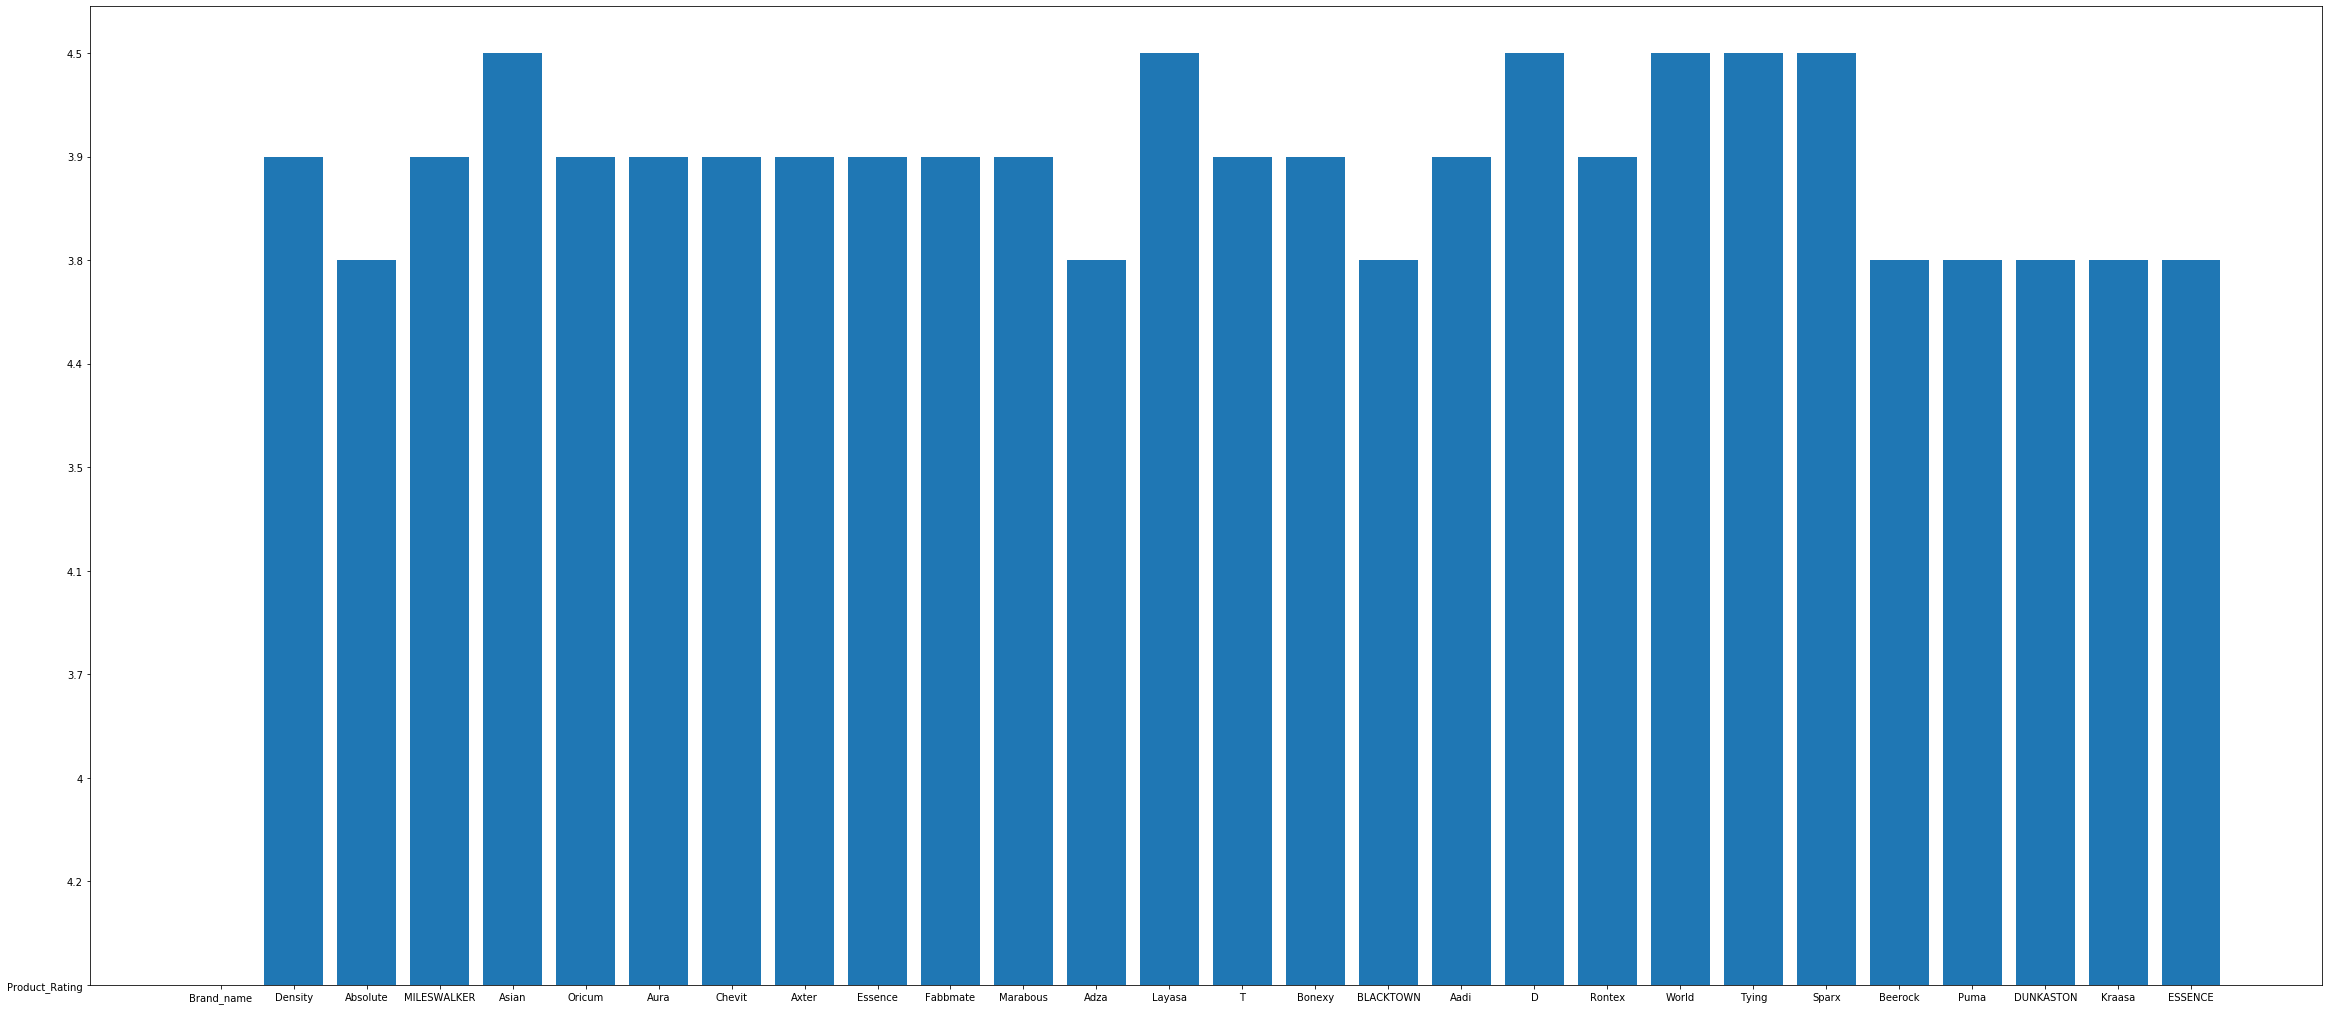

In [8]:
##########################Plot to get Brand Name versus Ratings#####################################
fig = plt.figure(figsize=(40,18))
plt.bar(formatted_data['Brand_name'],formatted_data['Product_Ratings'])
plt.show()

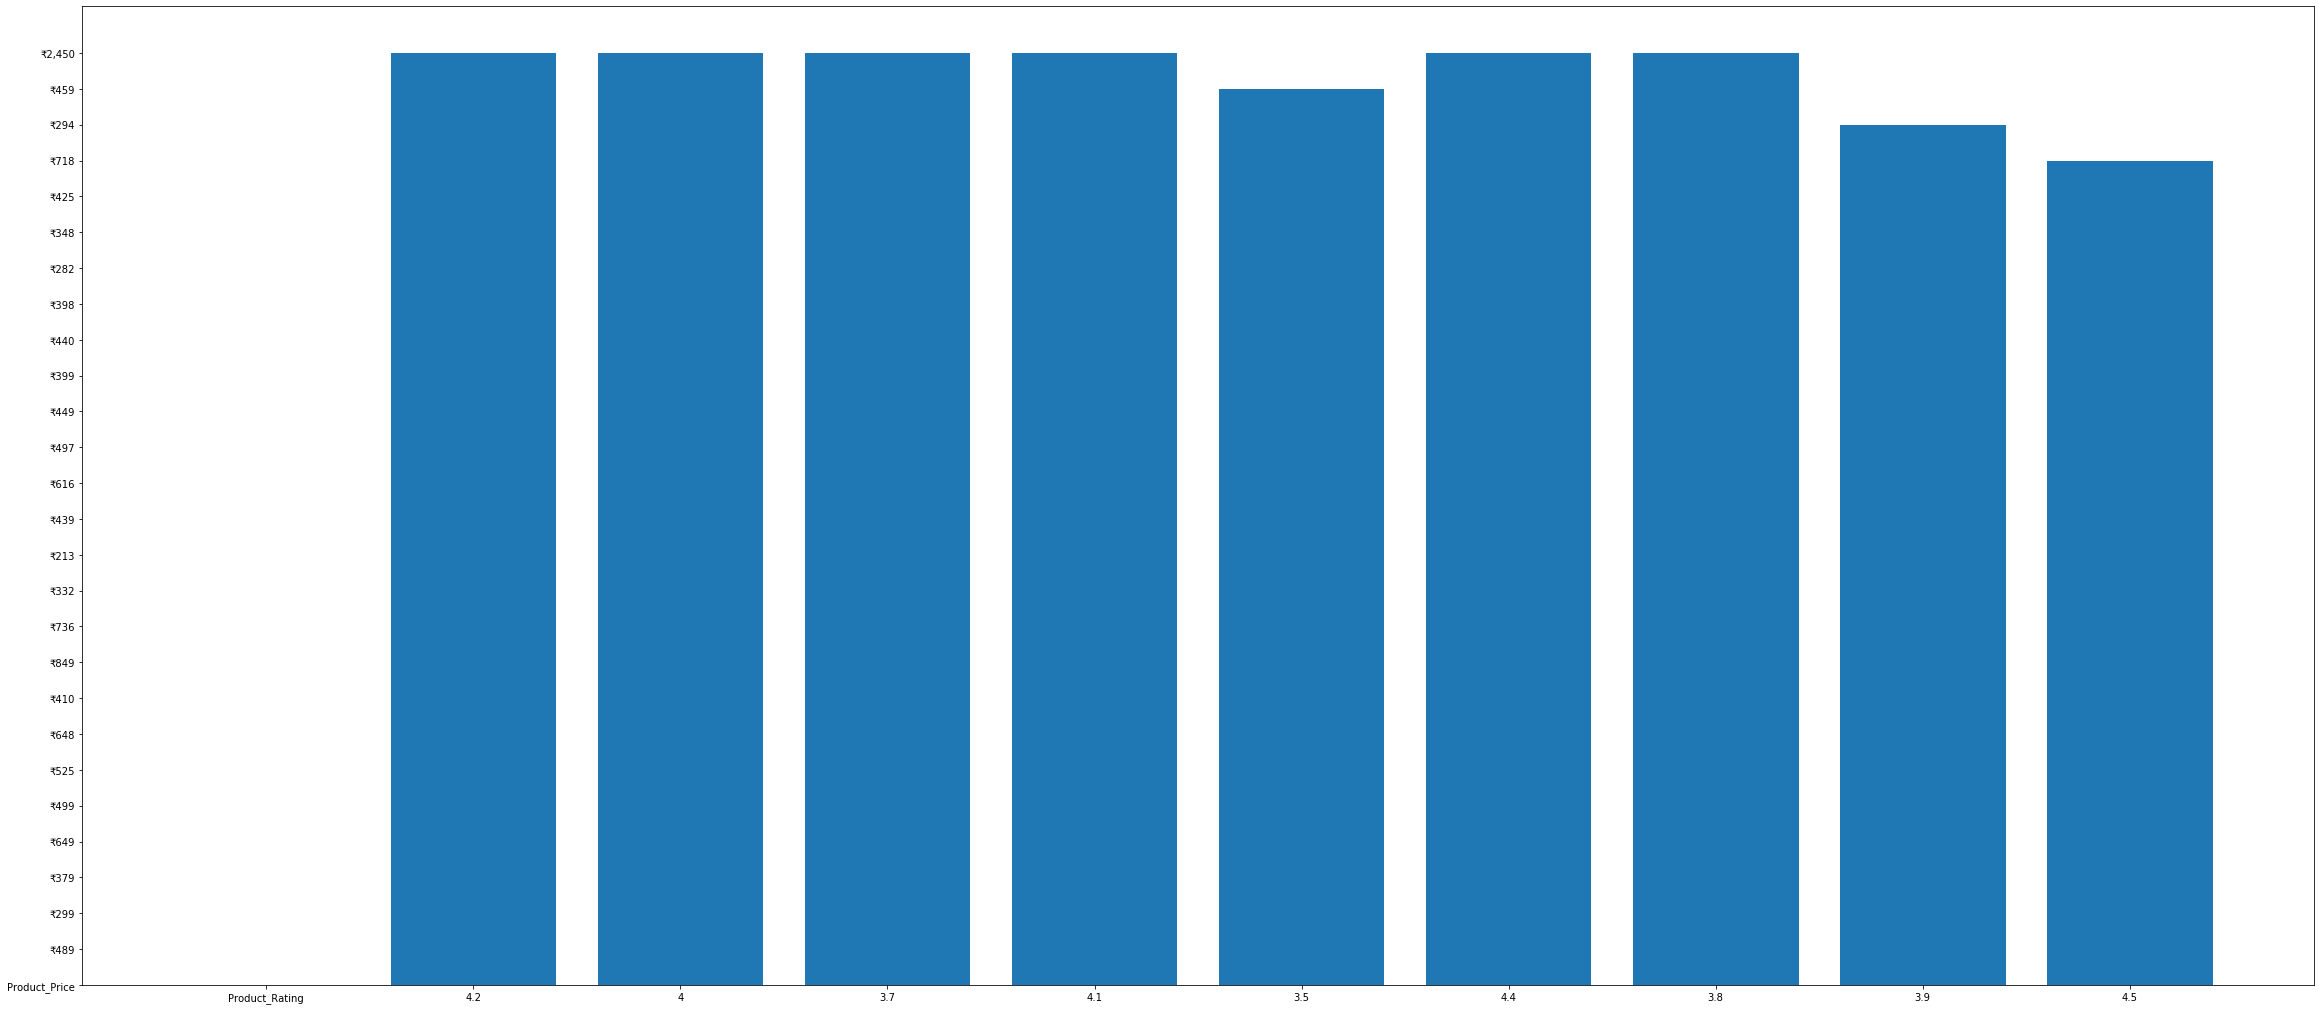

In [9]:
##############################Plot to get Price versus Ratings ##########################
fig = plt.figure(figsize=(40,18))
plt.bar(formatted_data['Product_Ratings'],formatted_data['Product_Price'])
plt.show()